C:\Users\amari\AppData\Local\Temp\ipykernel_25868\3198559352.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


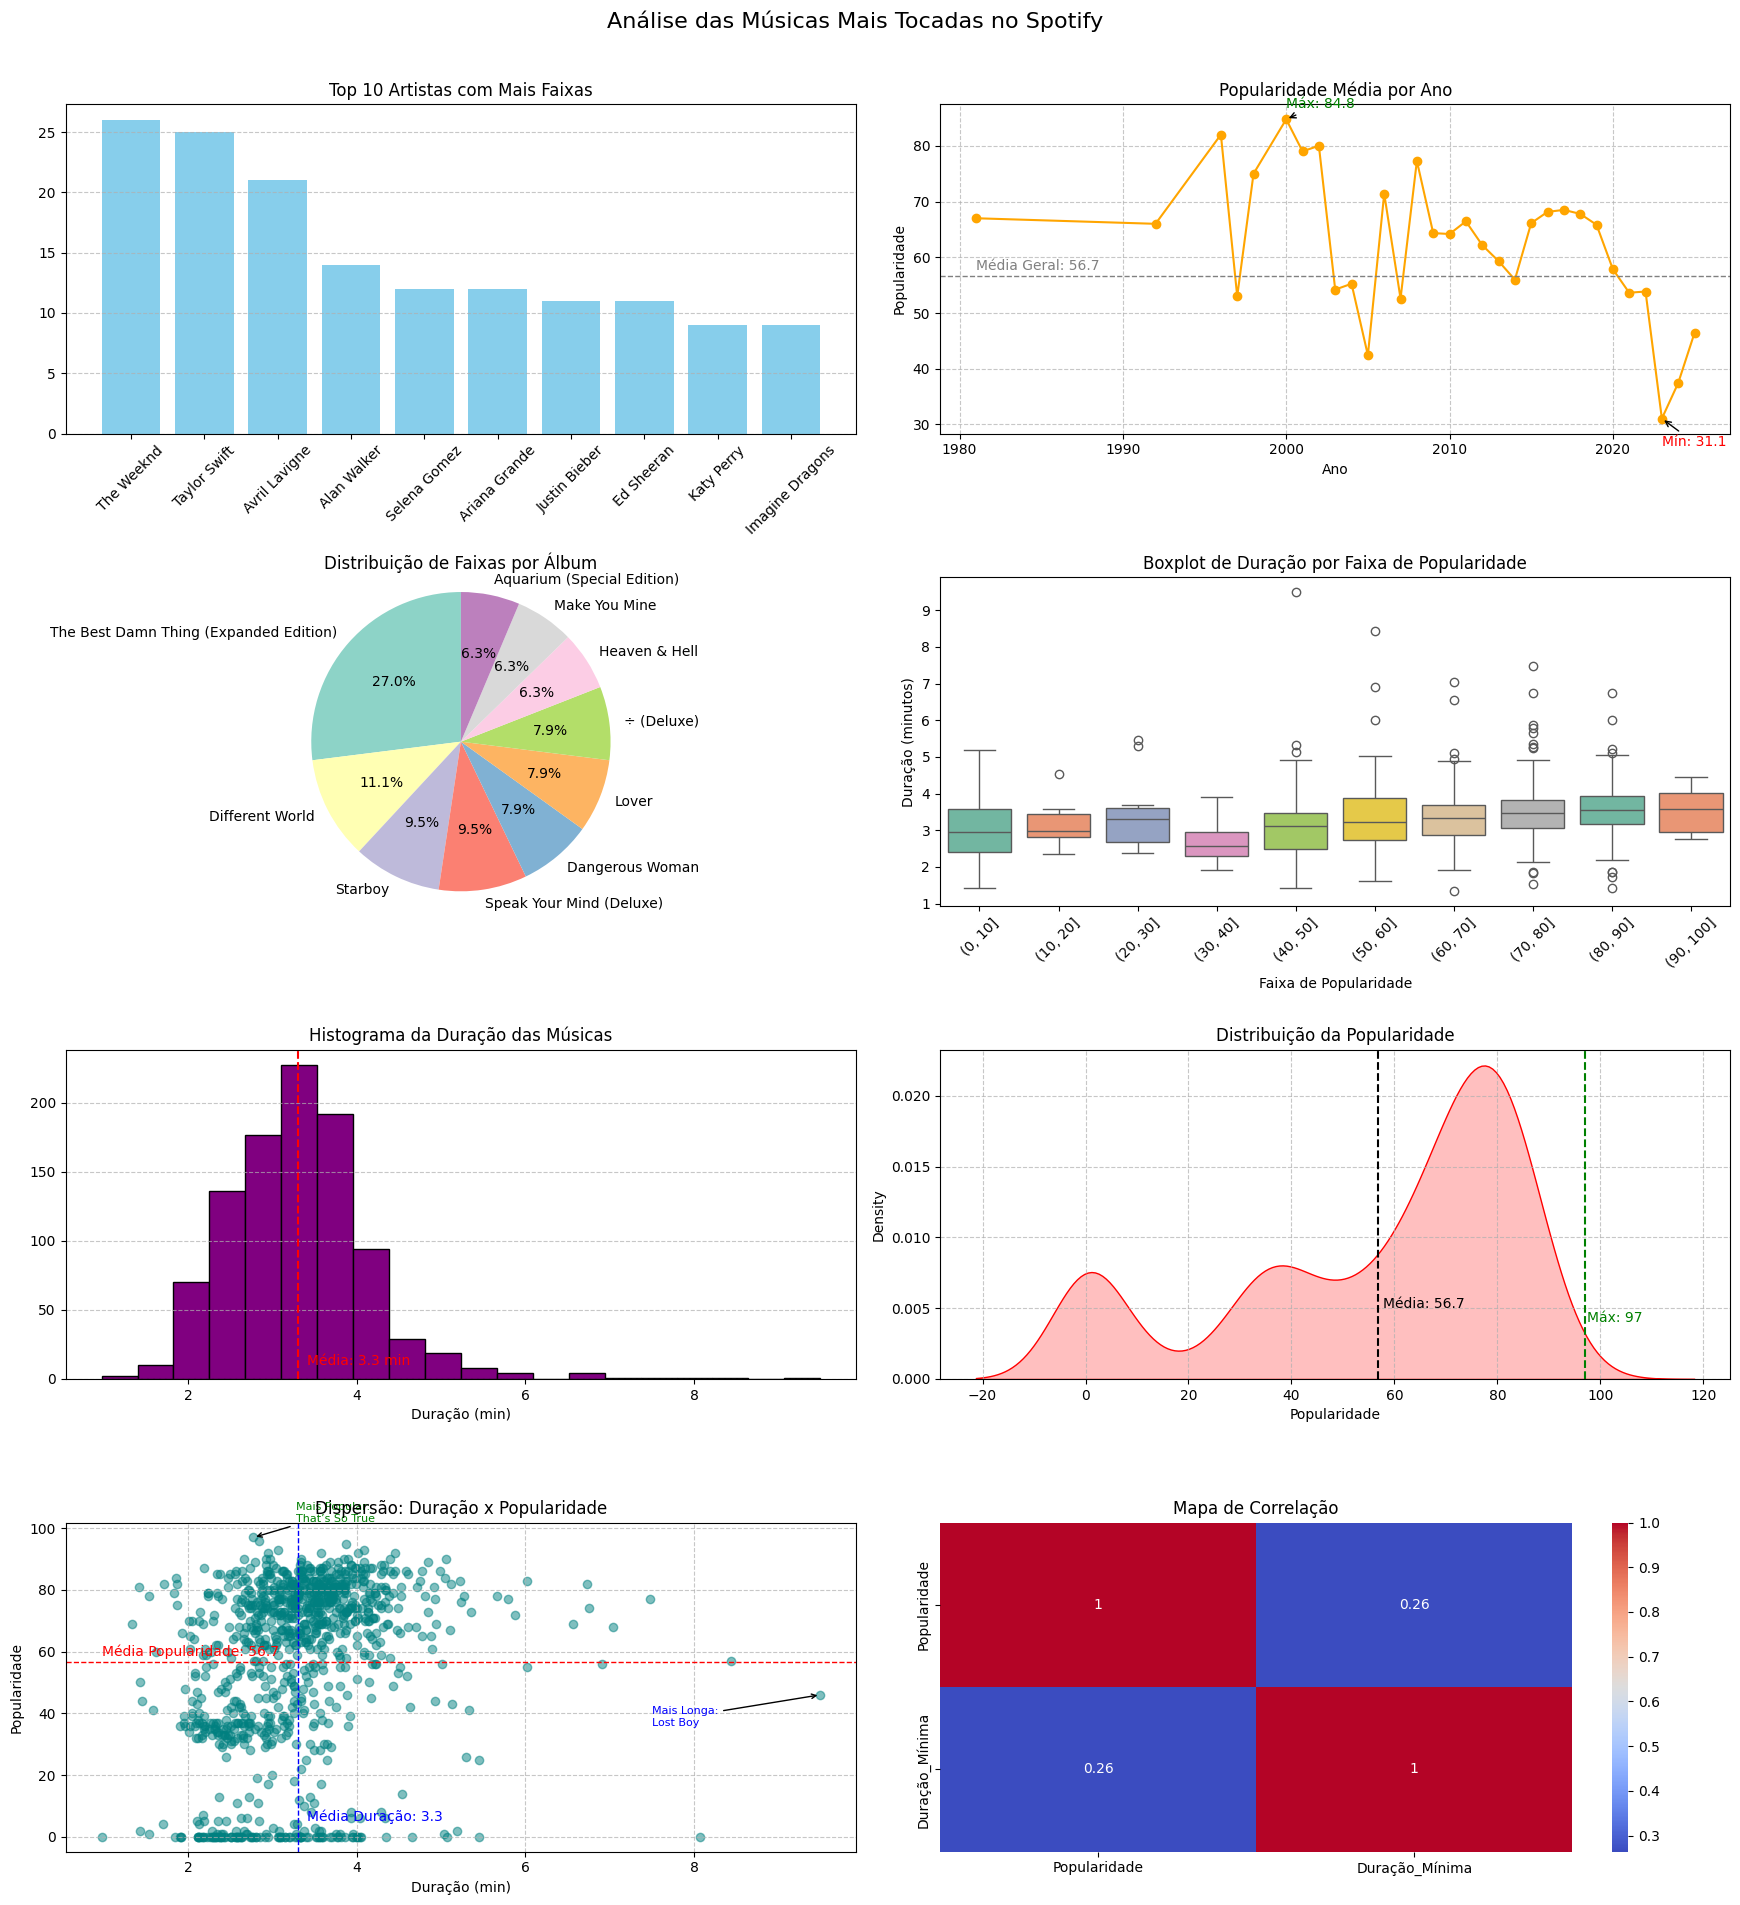

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Leitura da base de dados
df = pd.read_csv('spotify_top_1000_tracks.csv')

# Renomeando colunas
df = df.rename(columns={
    'track_name': 'Nome_Da_Faixa',
    'artist': 'Artista',
    'album': 'Álbum',
    'release_date': 'Data_De_Lançamento',
    'popularity': 'Popularidade',
    'spotify_url': 'Spotify_URL',
    'id': 'ID',
    'duration_min': 'Duração_Mínima'
})

# Conversões e limpeza
df['Popularidade'] = pd.to_numeric(df['Popularidade'], errors='coerce')
df['Duração_Mínima'] = pd.to_numeric(df['Duração_Mínima'], errors='coerce')
df['Ano'] = pd.to_datetime(df['Data_De_Lançamento'], errors='coerce').dt.year
df = df.dropna(subset=['Popularidade', 'Duração_Mínima', 'Ano'])

# Preparar valores estatísticos
media_geral = df['Popularidade'].mean()
media_duracao = df['Duração_Mínima'].mean()

# Gráficos
fig, axs = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle('Análise das Músicas Mais Tocadas no Spotify', fontsize=16)

# 1. Barra – Top 10 Artistas
top_artistas = df['Artista'].value_counts().nlargest(10)
axs[0, 0].bar(top_artistas.index, top_artistas.values, color='skyblue')
axs[0, 0].set_title('Top 10 Artistas com Mais Faixas')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True, axis='y', linestyle='--', alpha=0.7)

# 2. Linha – Popularidade média por ano
media_ano = df.groupby('Ano')['Popularidade'].mean()
axs[0, 1].plot(media_ano.index, media_ano.values, marker='o', color='orange')
axs[0, 1].set_title('Popularidade Média por Ano')
axs[0, 1].set_xlabel('Ano')
axs[0, 1].set_ylabel('Popularidade')
axs[0, 1].grid(True, linestyle='--', alpha=0.7)
axs[0, 1].axhline(media_geral, color='gray', linestyle='--', linewidth=1)
axs[0, 1].annotate(f'Média Geral: {media_geral:.1f}', xy=(media_ano.index.min(), media_geral + 1), color='gray')

# Máximo/mínimo
ano_max = media_ano.idxmax()
ano_min = media_ano.idxmin()
axs[0, 1].annotate(f'Máx: {media_ano.max():.1f}', xy=(ano_max, media_ano.max()), xytext=(ano_max, media_ano.max()+2),
                   arrowprops=dict(facecolor='green', arrowstyle='->'), color='green')
axs[0, 1].annotate(f'Mín: {media_ano.min():.1f}', xy=(ano_min, media_ano.min()), xytext=(ano_min, media_ano.min()-5),
                   arrowprops=dict(facecolor='red', arrowstyle='->'), color='red')

# 3. Pizza – Distribuição de Faixas por Álbum (Top 10)
top_albuns = df['Álbum'].value_counts().head(10)
axs[1, 0].pie(
    top_albuns,
    labels=top_albuns.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set3", 10)
)
axs[1, 0].set_title('Distribuição de Faixas por Álbum')
axs[1, 0].axis('equal')

# 4. Boxplot – Duração por Faixa de Popularidade
popularidade_bins = pd.cut(df['Popularidade'], bins=np.arange(0, 110, 10))
sns.boxplot(
    x=popularidade_bins,
    y=df['Duração_Mínima'],
    palette="Set2",
    ax=axs[1, 1]
)
axs[1, 1].set_title('Boxplot de Duração por Faixa de Popularidade')
axs[1, 1].set_xlabel('Faixa de Popularidade')
axs[1, 1].set_ylabel('Duração (minutos)')
axs[1, 1].tick_params(axis='x', rotation=45)

# 5. Histograma – Duração
axs[2, 0].hist(df['Duração_Mínima'], bins=20, color='purple', edgecolor='black')
axs[2, 0].set_title('Histograma da Duração das Músicas')
axs[2, 0].set_xlabel('Duração (min)')
axs[2, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
axs[2, 0].axvline(media_duracao, color='red', linestyle='--')
axs[2, 0].annotate(f'Média: {media_duracao:.1f} min', xy=(media_duracao + 0.1, 10), color='red')

# 6. KDE – Popularidade
sns.kdeplot(df['Popularidade'], ax=axs[2, 1], fill=True, color='red')
axs[2, 1].set_title('Distribuição da Popularidade')
axs[2, 1].grid(True, linestyle='--', alpha=0.7)
axs[2, 1].axvline(media_geral, color='black', linestyle='--')
axs[2, 1].annotate(f'Média: {media_geral:.1f}', xy=(media_geral + 1, 0.005), color='black')

# Máximo da popularidade
max_pop = df['Popularidade'].max()
axs[2, 1].axvline(max_pop, color='green', linestyle='--')
axs[2, 1].annotate(f'Máx: {max_pop}', xy=(max_pop + 0.5, 0.004), color='green')

# 7. Dispersão – Duração x Popularidade
axs[3, 0].scatter(df['Duração_Mínima'], df['Popularidade'], alpha=0.5, color='teal')
axs[3, 0].set_title('Dispersão: Duração x Popularidade')
axs[3, 0].set_xlabel('Duração (min)')
axs[3, 0].set_ylabel('Popularidade')
axs[3, 0].grid(True, linestyle='--', alpha=0.7)

# Linhas de média
axs[3, 0].axhline(media_geral, color='red', linestyle='--', linewidth=1)
axs[3, 0].axvline(media_duracao, color='blue', linestyle='--', linewidth=1)
axs[3, 0].annotate(f'Média Popularidade: {media_geral:.1f}', xy=(df['Duração_Mínima'].min(), media_geral + 2), color='red')
axs[3, 0].annotate(f'Média Duração: {media_duracao:.1f}', xy=(media_duracao + 0.1, df['Popularidade'].min() + 5), color='blue')

# Destaques: mais popular e mais longa
musica_max = df[df['Popularidade'] == max_pop].iloc[0]
musica_long = df[df['Duração_Mínima'] == df['Duração_Mínima'].max()].iloc[0]

axs[3, 0].annotate(f'Mais Popular:\n{musica_max["Nome_Da_Faixa"]}', 
                   xy=(musica_max['Duração_Mínima'], musica_max['Popularidade']),
                   xytext=(musica_max['Duração_Mínima'] + 0.5, musica_max['Popularidade'] + 5),
                   arrowprops=dict(facecolor='green', arrowstyle='->'),
                   fontsize=8, color='green')

axs[3, 0].annotate(f'Mais Longa:\n{musica_long["Nome_Da_Faixa"]}', 
                   xy=(musica_long['Duração_Mínima'], musica_long['Popularidade']),
                   xytext=(musica_long['Duração_Mínima'] - 2, musica_long['Popularidade'] - 10),
                   arrowprops=dict(facecolor='blue', arrowstyle='->'),
                   fontsize=8, color='blue')

# 8. Mapa de Calor – Correlação
sns.heatmap(df[['Popularidade', 'Duração_Mínima']].corr(), annot=True, cmap='coolwarm', ax=axs[3, 1])
axs[3, 1].set_title('Mapa de Correlação')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


### 1. Top 10 Artistas com Mais Faixas
Este gráfico mostra os artistas com maior número de músicas no ranking das 1000 mais tocadas do Spotify. Isso evidencia quais nomes são mais recorrentes entre as faixas populares, indicando domínio no mercado musical e presença constante nas paradas.

###  2. Evolução da Popularidade Média por Ano
A linha demonstra como a popularidade média das músicas variou ao longo dos anos. É possível identificar tendências, como aumento ou queda da média em certos períodos. Isso pode refletir mudanças no gosto do público, na forma de consumo de música ou na própria estratégia da plataforma.



### 3. Duração das Músicas Mais Comuns
A maioria das faixas populares possui durações entre 2.5 e 4 minutos. Isso sugere um padrão de tempo ideal que maximiza a aceitação do público e o desempenho nas plataformas digitais, reforçando a ideia de que músicas muito curtas ou longas fogem do "tempo comercial" mais eficiente.

### 4. Boxplot da Popularidade
O boxplot mostra a distribuição da popularidade entre as músicas. A maior parte das faixas está concentrada entre 60 e 85 de popularidade. Os outliers superiores representam faixas extremamente populares, enquanto os inferiores são músicas que, mesmo no top 1000, têm desempenho mais modesto.

### 5. Histograma da Duração
O histograma indica que a grande maioria das músicas tem entre 2.5 e 4 minutos. A frequência reduz significativamente para faixas com menos de 2 ou mais de 5 minutos, confirmando a tendência observada também no gráfico de pizza.

### 6. Distribuição da Popularidade (KDE)
A curva de densidade mostra que a popularidade das músicas segue um padrão onde muitas faixas estão entre 70 e 80. Há uma distribuição assimétrica com poucos casos nas extremidades, o que indica que músicas extremamente populares ou impopulares são minoria.

### 7. Dispersão: Duração x Popularidade
Este gráfico mostra que não há uma relação clara entre a duração da faixa e sua popularidade. Músicas curtas e longas aparecem com diferentes níveis de sucesso, o que reforça que o tempo da música não é um fator decisivo para seu desempenho na plataforma.

### 8. Mapa de Correlação
A correlação entre Popularidade e Duração é praticamente nula (~0.02), mostrando que esses dois fatores são independentes. A popularidade de uma música depende mais de outros elementos como artista, estilo, divulgação e engajamento, e não diretamente do tempo da faixa.

### Conclusão Geral
A análise das 1000 faixas mais populares do Spotify revelou padrões interessantes sobre o comportamento do mercado musical na plataforma. Observou-se que poucos artistas concentram grande parte das músicas de sucesso, evidenciando um forte domínio de nomes consolidados na indústria.

Em relação ao tempo das faixas, ficou claro que a maioria das músicas segue uma estrutura de duração entre 2,5 e 4 minutos, o que sugere um padrão preferido tanto pelos artistas quanto pelo público — possivelmente ligado à retenção de ouvintes e à lógica das plataformas de streaming.

No entanto, a análise também mostrou que a duração de uma música não está diretamente relacionada à sua popularidade, como reforçado pelo gráfico de dispersão e pelo mapa de correlação. Isso indica que o sucesso de uma faixa depende mais de outros fatores como marketing, viralização, qualidade musical e presença do artista.

Ao longo dos anos, nota-se variações na média de popularidade das músicas, refletindo mudanças nos hábitos de consumo, no estilo musical dominante e nas dinâmicas culturais. Ainda assim, há uma consistência geral na faixa de popularidade entre as músicas mais ouvidas, com poucos extremos.

Esses resultados ajudam a entender melhor o que caracteriza uma música popular e oferecem uma base para estratégias de produção, lançamento e promoção musical no ambiente digital.

